# Applications of Gradient Descent In Machine Learning
by Timothy Gao

## Table Of Contents:
* 1: Logistic Regression
    * 1.1: Introducing Weights
    * 1.2: Activation Function
    * 1.3: Introducing Bias
    * 1.4: Summary
    
* 2: Gradient Descent
    * 2.1: Introducing Loss Functions
    * 2.2: Minimizing Loss Functions
    * 2.3: Introducing Gradient Descent
    * 2.4: Learning Rate
    * 2.5: Local Minimums and Saddle Points
    * 2.6: Deriving and Finding $\nabla J$

* 3: Ideas in Practice (Implementation With Detailed Comments)
* 4: Gradient Descent Visualization
* 5: References

## Section 1: Logistic Regression <a class="anchor" id="1"></a>

#### 1.1: Introducing Weights <a class="anchor" id="1.1"></a>

We wish to predict a probability that a cell is cancerous based on a set of input variables, called features (e.g., cell radius, texture, concavity). In machine learning, this is called a binary classification problem: we wish to predict the probability for a binary class (yes or no cancer, 1 or 0).

Let each feature be an element of the vector $x = < x_1, x_2, ..., x_n >$

Ultimately, we desired a scalar value. How can we convert this n-dimensional vector of features into a single scalar? Dot Product!

Let weights be the vector $w = < w_1, w_2, ... w_n >$. Then $s = w \cdot x = \Sigma^{n}_{i=1} w_i x_i$. Visually:

Utilizing a visually example, we have:

<center><img width="400" height="400" src="https://raw.githubusercontent.com/timothygao8710/Applications-of-Gradient-Descent-in-Machine-Learning/main/images/dotproduct.png"/></center>
<sub> note these are made-up numbers for demonstration purposes


Intuitively, the weight of each feature represents its overall "importance" in the prediction outcome. However, $s$ does not denote our predicted probability.

#### 1.2: Activation Function <a class="anchor" id="1.2"></a>

Now, we need a function $\sigma (s)$ to transform $s \in \mathbb{R}$ into our desired probability, $p \in (0,1)$

These functions are called activation functions in machine learning. Here are some examples:

<center><img width="500" height="500" src="https://raw.githubusercontent.com/timothygao8710/Applications-of-Gradient-Descent-in-Machine-Learning/main/images/activationfunctions.png"></center>

One of the most used activation functions in many machine learning models is the sigmoid function:

$$ \sigma (z) = \frac{1}{-e^{z}}$$

The sigmoid function has a peculiar advantage for being easily differntiable, which will prove very helpful later.

$$ \sigma ' (z) = \frac{\mathrm{d} \sigma}{\mathrm{d} z} = (\sigma(z))(1 - \sigma(z))$$

<center><img width="1000" height="1000" src="https://raw.githubusercontent.com/timothygao8710/Applications-of-Gradient-Descent-in-Machine-Learning/main/images/sigmoid.png"></center>

#### 1.3: Introducing Biases <a class="anchor" id="1.3"></a>

In order to horizontally shift $s$ such that it fits within the "useful" domain of the sigmoid function (so it doesn't just evaluate to 0.00001 or 0.99998 every time), we add an additional bias, a scalar $b$. Putting everything together, we have:

$$ z = w \cdot x + b $$

#### 1.4: Summary <a class="anchor" id="1.4"></a>

$$ p = \sigma (z) = \frac{1}{-e^{w \cdot x + b}} $$

In machine learning, we usually denote model parameters, in this case $w$ and $b$, as $\theta$. More formally,

$$ \theta = < w, b > $$

As a function of theta, our model makes predictions on

$$ f(x, \theta) = \frac{1}{-e^{{\theta}_w} \cdot x + {\theta}_b} $$

Now, the problem of predicting probability is reduced to the problem of finding optimal weights ($w$) and bias ($b$). The finding of optimal weights and bias is the "learning" part of machine learning. We will focus on a particular algorithm called called Logistic Regression, that makes predictions based on $\sigma (w \cdot x + b)$.

## Section 2: Gradient Descent <a class="anchor" id="2"></a>


#### 2.1: Introducting Loss Functions <a class="anchor" id="2.1"></a>

In order to find the optimal weights and bias, we first need to define what "optimal" means. In machine learning, optimal means minimizing error. This error, depends on the difference between our predicted outcome and the expected outcome, and can be defined as a function called the loss function or cost function. The smaller our loss function, the better our model is doing. In your AP Statistics class you may have learned about least squared error ($\sum (p - y)^2$), which is indeed a type of loss function, but it's typically used in another type of task in machine learning called regression. For binary classification, there are a few popular options:

- Cross Entropy: $L_{CE}(y, p) = -{(y\log(p) + (1 - y)\log(1 - p))}$

- Negative Loglikelihood: $L_{NL}(y, p) = -{\log(p(y))}$

- Hinge Loss: $L_{HL}(y, p) = max(0, 1 - y \cdot (\left \lceil{p + 0.5}\right \rceil))$

<sub> Note y is the actual (expected) binary 0/1 classes, while p is our predicted probability $\in [0, 1]$ <\sub> 

Logistic Regression uses Cross Entropy, a standard and utilitarian loss function in binary classification.

Recall from the previous section that $p = \sigma (w \cdot x + b)$. Plugging this in:
    
$$ L_{CE}(w, b, y) = {y\log(\sigma (w \cdot x + b))) + (1 - y) \log (1 - \sigma (w \cdot x + b))} $$
    
Again, $y$ is our actual/expected binary classes, $w$ is the vector of our weights, and $b$ is the scalar of our bias.
    
To improve our model, we need to minimize this function... This sounds like Multivariable Calculus!

#### 2.2: Minimizing the Loss Function <a class="anchor" id="2.2"></a>

In order for our model to be able to "intellegently" deal with any input we give it, it needs to train on large amounts of diverse data. In general, we want to select weights and biases that will minimize $L_{CE}$ over $m$ sets of observations, each containing $n$ features and $1$ expected output ($y$). For example, here is what UCI's breast cancer dataset:
    
<center><img width="2000" height="2000" src="https://raw.githubusercontent.com/timothygao8710/Applications-of-Gradient-Descent-in-Machine-Learning/main/images/datasetdemo.png"></center>

We have 31 features ($n = 31$) and a total of 569 observations/rows ($m = 569$).
    
To make our model more versatile and adaptable, we need to minimize the loss function over all $m$ observations. More formally, we aim to minimize:

$$ \frac{1}{m} \sum_{i=1}^{m} L_{CE}({\theta}, y_i) $$

After putting everything together, we wish to find:

$$ \text{argmin}_{\theta} \frac{1}{m} \sum_{i=1}^{m} {y_i \log(\sigma ({\theta}_w \cdot x_i + {\theta}_b)) + (1 - y_i) \log (\sigma ({\theta}_w \cdot x_i + {\theta}_b))} $$
    
This is exactly the task of gradient descent.
    
#### 2.3: Introducing Gradient Descent <a class="anchor" id="2.3"></a>
    
In gradient descent, we call this function $J(\theta) = J(w, b) = \frac{1}{m} \sum_{i=1}^{m} L_{CE}({\theta}, y_i)$.
    
Here are the steps of a bare-bones gradient descent algorithm:
1. Generate a random ${\theta}_t = {\theta}_0$, which corresponds to the point $({{\theta}_0}_{w}, {{\theta}_0}_{b}, J({\theta}_0))$


2. Determine the direction of greatest descent from $({{\theta}_t}_{w}, {{\theta}_t}_{b}, J({\theta}_t))$, which we learned from multivar is in the opposite direction of the gradient vector, or $- \nabla J({\theta}_t)$


3. Modify $\theta$ by performing vector addition with $-\nabla J({\theta}_t)$ multiplied by a constant, $\eta$, which is called the learning rate. More formally, ${\theta}_{t+1} = {\theta}_t - {\eta} \cdot \nabla J({\theta}_t)$


4. Repeat from step 2 with ${\theta}_t$ iff ${\theta}_t \neq {\theta}_{t+1}$ and $t < C$, where $C$ is some constant indicating the maximum number of iterations
    
Here is a visualization of the outlined process, with vectors indicating each iteration of the algorithm:

<center><img width="700" height="700" src="https://raw.githubusercontent.com/timothygao8710/Applications-of-Gradient-Descent-in-Machine-Learning/main/images/GDVis.png"></center>

In this example, we took 13 steps from our initial ${\theta}_0$, so ${\theta}_{final} = {\theta}_{13}$.

Informally, we can think of this as incremental taking steps down a "mountain," which is the surface curve of our function $g$. Each step, each iteration, we are getting closer and closer to reaching the global minimum.

#### 2.4: Learning Rate <a class="anchor" id="2.4"></a>

The learning rate, $\eta$, determines how fast we descend down $J$. Recall the equation for modifying $\theta$:

$$ {\theta}_{t+1} = {\theta}_t - {\eta} \cdot \nabla J({\theta}_t) $$

The larger the $\eta$, the faster we descent. However, this comes at the cost of less accuracy in pinpointing the exact location of the minimum. Here's an oversimplified but helpful visualization in 2D:

<center><img width="1000" height="1000" src="https://raw.githubusercontent.com/timothygao8710/Applications-of-Gradient-Descent-in-Machine-Learning/main/images/LRTypes.png"></center>

Note how the slow learning rate sacrafises computational efficiency (speed), while the too high learning rate results in inaccurate pinpoint or divergent behavior, where $J({\theta}_{t+1}) > J({\theta}_t)$

The learning rate for any particular machine learning application undergoes a process called [Hyperparameter Tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization) to find the optimal $\eta$ (which is a hyperparameter of the model) for its particular application and $g$ function.

Additionally, many implementations of gradient descent choose to reduce $\eta$ overtime along with ${\theta}$, first quickly descending to reach a general region that is likely to contain the global minimum, then more slowly descending to converge on it (see section 4, this idea is implemented in my simulation).

The challenge of finding the optimal learning rate can be tackled by utilizing hyperparameter tuning and changing $\eta$ overtime, but another significant obstacle in Logisitic Regression is escaping local minimums and saddle points.

#### 2.5: Local Minimums and Saddle Points <a class="anchor" id="2.5"></a>

As we've learned in multivar, saddle points and local critical points ($f_x = 0, f_y = 0$) have the same $\nabla J$ as global minimums. Many variations of the bare-bones, classical gradient descent have sprung up to address this issue. For example:

- Stochastic gradient descent: we add noise on top of our loss function, and perform gradient descent on what's effectively the "noisy gradient", so as to introduce potential paths to escape out of a local minimum/saddle point.
- Momentum gradient descent: we treat $\theta$ intuitively as a ball that is rolling downhill, adding the idea of momentum so that it can escape local minimums/saddle points as it "rolls downhill".

There are other variations, and this gif highlights popular ones, using a contour graph:

<center><img width="500" height="500" src="https://raw.githubusercontent.com/timothygao8710/Applications-of-Gradient-Descent-in-Machine-Learning/main/images/GDvariations.gif"></center>

The bottom graph demonstrates $J(\theta)$ over number of iterations ($t$).

Another simple idea is to perform gradient descent on many random points to maximize our chance of finding the global minimum on one of them, but this comes at the cost of computational efficiency.

#### 2.6: Deriving and Finding $\nabla J$ <a class="anchor" id="2.6"></a>

First, recall from section 2.2 that

$$ J(\theta) = J(w, b) = \frac{1}{m} \sum_{i=1}^{m} L_{CE}({\theta}, y_i) = \frac{1}{m} \sum_{i=1}^{m} {y_i \log(\sigma ({\theta}_w \cdot x_i + {\theta}_b)) + (1 - y_i) \log (\sigma ({\theta}_w \cdot x_i + {\theta}_b))} $$


Second, recall from section 1.2 the derivative of a sigmoid:

$$ \sigma ' (z) = \frac{\mathrm{d} \sigma}{\mathrm{d} z} = (\sigma(z))(1 - \sigma(z))$$

Because both the loss function (cross entropy) and activation function (sigmoid) are differentiable, we find that 

<center><img width="350" height="350" src="https://raw.githubusercontent.com/timothygao8710/Applications-of-Gradient-Descent-in-Machine-Learning/main/images/deriv.png"></center>

Note that y-hat, or predicted output, is equivalent to $p$, the predicted probability. Here, $N$ denotes the number of observations/samples/rows in our training dataset instead of $m$.

Let's start by taking the partial derivative of the loss function with respect to a single weight $w_j$:

<center><img width="500" height="500" src="https://raw.githubusercontent.com/timothygao8710/Applications-of-Gradient-Descent-in-Machine-Learning/main/images/derivAA.png"/></center>

Then, using the chain rule and the fact that $\frac{d}{dx} ln(x) = \frac{1}{x}$:

<center><img width="600" height="600" src="https://raw.githubusercontent.com/timothygao8710/Applications-of-Gradient-Descent-in-Machine-Learning/main/images/derivA.png"/></center>

Rearranging:

<center><img width="500" height="500" src="https://raw.githubusercontent.com/timothygao8710/Applications-of-Gradient-Descent-in-Machine-Learning/main/images/derivB.png"/></center>

Now plugging in derivative of a sigmoid and using the chain rule again:

<center><img width="700" height="700" src="https://raw.githubusercontent.com/timothygao8710/Applications-of-Gradient-Descent-in-Machine-Learning/main/images/derivC.png"/></center>

For biases, we follow a very similar procedure, but take the partial derivative of $b$ in respect to $J$ instead.

## Section 3: Ideas in Practice (Implementation With Detailed Comments) <a class="anchor" id="3"></a>

We also test our implementation on a real dataset provided by UC Irvine, predicting breast cancer based on a set of cell parameters. More details on the dataset [here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)). The dataset is avaliable for download [here](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/download?datasetVersionNumber=2).

In [1]:
#  numpy for fast math operations, like dot product
import numpy as np

# sklearn for train-test-split function to split our dataset, confusion matrix, accuracy score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

# pandas for handling breast cancer dataset as a DataFrame
import pandas as pd

# seaborn and matplotlib for graphing
import seaborn as sn
import matplotlib.pyplot as plt

/Users/gaofamily/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# learning rate for gradient descent
LR = 0.0015

# number of random starting points to take. We are utilizing the idea in 2.5, taking many random starting points
n_iters = 25

# number of steps to take in GD
n_steps = 1000

# weights: relative importances of features
# bias: "shift"/location of the activation function
# activation function is sigmoid
weights, biases = 0, 0

In [3]:
# activation function
def sigmoid(x):
    """
    Computes sigmoid function to calculate probability based on w * x + b
    Input: Scalar, w * x + b
    Returns: Scalar, probability in (0, 1)
    """
    return 1.0/(1.0 + np.exp(-x))

# loss function:
def cross_entropy(predictions, targets, epsilon = 1e-14):
    """
    Computes cross entropy between predicted probabilities and actual 0/1 classifications. 
    Input: predictions vector of predicted classes' probabilities
           targets vector of actual 0/1 classes
    Returns: scalar representing loss
    """
    n = predictions.shape[0]
    return -(1/n) * np.sum(targets*np.log(predictions + epsilon) + (1-targets)*np.log(1 - predictions + epsilon))

# calculating the derivative of J
def calc_dir(x, bias, predicted, actual):
    """
    Computes the gradient descent vector or maximum direction of descent for use to update theta
    Input: weights = coefficients for features
           bias = single-value added to prediction output     
           predicted = predicted 0/1 classes for classification output
           actual = actual 0/1 classes for classification output
    Returns: tuple of 2 elements
             gradient descent vector <dw, db> = vector of greatest descent for weights and biases, respectively
    """
    N = len(weights)
    
    # compute partial derivative for weights
    dW = (1/N) * 2 * np.dot(x.T, predicted - actual)
    # compute partial derivative for bias
    dB = (1/N) * 2 * np.sum(predicted - actual)

    return [dW, dB]

In [4]:
# gradient descent algorithm, as discussed in section 2
def gradient_descent(weights, bias, x, y, LR, report=False):
    """
    Performs gradient descent to optimize initial starting weights and bias from a given starting point
    
    Input: x = training set containing input features
           y = training set containing expected classification
           weights = n-d vector/numpy_array
           bias = scalar
           LR = scalar, learning rate
           report = wether prin
    Returns: tuple of 2 elements, (weights, bias)
    """
    
    for i in range(n_steps):
        # for each row of features, we generate a corresponding number by multiplying each weight by feature value
        predicted_vals = np.dot(x, weights.T) + bias
        
        # for each feature value, we predict its class probability utilizing the sigmoid function
        predicted_probs = sigmoid(predicted_vals)

        if report:
            print("On step " + str(i) + "th step, loss equals " + str(cross_entropy(predicted_probs, y)))
        
        # calculated derivatives
        derivs = calc_dir(x, bias, predicted_probs, y)
        dW = derivs[0]
        dB = derivs[1]
        
        # "descent" down using learning rate
        weights -= LR * dW
        bias -= LR * dB
        
    return [weights, bias]

In [5]:
# train function that puts everything together
def train(x, y, report = False):
    """
    Optimizes weights and biases given initial training set. Utilizes entire training set (must train-test-split beforehand)
    
    Input: x = model input of training dataset, 2darray containing m samples (entries) and n features
           y = expected model output of training dataset, 1darray containing n classification results (0/1)

    """
    # declare variables to use
    global weights, bias
    m, n = x.shape
    
    # we take n_iters random starting points
    for _ in range(n_iters):
        # random starting points: random vector/np_array of size n
        weights = np.random.rand(n)
        
        # random starting points: random bias
        bias = np.random.rand(1)[0]
    
        # gradient descent from this random starting point
        res = gradient_descent(weights, bias, x, y, LR, report)
        
        # extract content from result
        weights = res[0]
        bias = res[1]
        

In [6]:
# predicts probability of a given test set (that is completely different from the training set), utilizing weights, bias, and the sigmoid function
def predict_probs(x):
    """
    Utilizes pre-optimized weights and biases to outputs class probability given m entries of nd-vector of features
    
    Input: m by n matrix of feature
    Output: m-d vector of class probabilities for each entry
    """
    
    # utilize formula discussed in section 1 to acquire values: w * x + b
    predicted_vals = np.dot(x, weights.T) + bias
    # apply the sigmoid function to convert value to probability
    predicted_probs = sigmoid(predicted_vals)
    
    return predicted_probs

# rounds predicted probabilities to the nearest integer (0/1) to predict actual binary classes
def predict(x):
    """
    Utilizes pre-optimized weights and biases to outputs class given m entries of nd-vector of features
    
    Input: m by n matrix of feature
    Output: m-d vector of 0/1 class for each entry
    """

    # call predict_probs function to predict probabilities
    x = predict_probs(x)
    # round the numbers
    x = [0 if i < 0.5 else 1 for i in x]
    
    return x

In [29]:
# load dataset
data = pd.read_csv('UCIDataset.csv')
# show the dataset
data

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [30]:
%%time
# ^ the above displays time for this cell to run

# make variables x, the features, and y, the output class
x = data.drop(['Unnamed: 32', 'Unnamed: 0', 'diagnosis', 'id'], axis = 1)
y = data['diagnosis']

# convert them to numpy arrays for faster math operations like dot product
x = x.to_numpy()
y = y.to_numpy()

# perform train test split with 80% to 20%, dividing our original dataset. The training set will be used to optimize weights and biases, then the completely untouched test set will be used to test its accuracy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)
# call the train function to optimize weights and biases based on the training dataset
train(x_train, y_train)

print("Time for training Logistic Regression Model:")

<ipython-input-3-eca20362b6bd>:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))


Time for training Logistic Regression Model:
CPU times: user 2.49 s, sys: 5.8 s, total: 8.29 s
Wall time: 1.63 s


In [31]:
%%time
# ^ the above displays time for this cell to run

# call the predict function on testing dataset
y_pred = predict(x_test)

print("The final accuracy of the model is " + str(100 * accuracy_score(y_test, y_pred)) + "%.")
print("Time for testing Logistic Regression Model:")

The final accuracy of the model is 92.10526315789474%.
Time for testing Logistic Regression Model:
CPU times: user 1.91 ms, sys: 1.08 ms, total: 2.99 ms
Wall time: 3.18 ms


<ipython-input-3-eca20362b6bd>:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))


<AxesSubplot:>

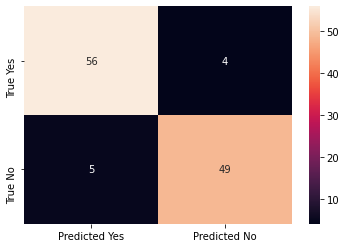

In [32]:
# make a confusion matrix to better understand our results
array = confusion_matrix(y_test, y_pred)
# turn the confusion matrix into a DataFrame to plot it
df_cm = pd.DataFrame(array, index = ['True Yes', 'True No'],
                  columns = ['Predicted Yes', 'Predicted No'])

# use matplotlib and seaborn to plot it
plt.figure()
# use matplotlib and seaborn to plot it
sn.heatmap(df_cm, annot=True)

## Section 4: Gradient Descent Visualization <a class="anchor" id="4"></a>

[Link to website (might take some time to load) ](https://gradientdescent.herokuapp.com/) |
[Link to code](https://github.com/timothygao8710/Applications-of-Gradient-Descent-in-Machine-Learning/blob/main/webvis.py)

As part of my project, I also made a visualization of the gradient descent algorithm on an interactive 3D graph. The user can customize the graph by entering their own equation for the function $f(x, y)$, the maximum and minimum values of the function, as well as the learning rate $\eta$. After graphing, a visual similar to that in section 2.3 will be displayed, where vectors scaled to the magnitude of each step taken in gradient descent will be shown on the 3D graph. The user can use their cursor to rotate the graph, zoom in and out (by scrolling), pan the graph, take a screenshot, and play around with different camera angles. The minimum value found by gradient descent by also be displayed at the bottom.

In my simulation, I employed in the idea in section 2.4, utilizing

$$ {\eta}_{t+1} = {\eta}_{t} \cdot \frac{1}{e^{a}} $$ 

to reduce the learning rate overtime. $a$ is a constant that I experimentally found to be optimal at around ~$0.3$. This exact formula is inspired by [Simulated Annealing](https://en.wikipedia.org/wiki/Simulated_annealing), a meta-heuristic for optimization problems whose core idea is quite similar to gradient descent.

To find the global minimum, I also generated many random points to maximize the chance of finding a global minimum on one of them, as in section 2.5.

To actually build the graph itself, I utilized the plotly graphing library, computing many disjoint points on a 2D meshgrid, then connecting them to form the 3D graph. The core idea is that of [Riemann Sums](https://en.wikipedia.org/wiki/Riemann_sum), but extended to three dimensions, and rather than finding the area, we're connecting points to build a visualization. As a consequence of this method of generating the graph, 1) the global minimum found may be off by a tiny amount (as the actual minimum can only be achieved iff it is one of the points computed) and 2) the visualization struggles with graphs with a large domain because it'll have to compute quadratically more points, so the max and min are capped (note however that the gradient descent algorithm could perfectly handle a larger domain, as it does for real machine learning loss function such as the one it faces in this notebook's breast cancer dataset).

## Section 5: References <a class="anchor" id="5"></a>
    
Fernandes, Antônio Alves Tôrres, et al. "Read this paper if you want to learn logistic regression." Revista de sociologia e politica 28 (2021).
    
Sanderson, Grant. “Gradient Descent, How Neural Networks Learn | Chapter 2, Deep Learning.” YouTube, YouTube, 16 Oct. 2017, https://www.youtube.com/watch?v=IHZwWFHWa-w. 

Sebastian Ruder. “An Overview of Gradient Descent Optimization Algorithms.” Sebastian Ruder, Sebastian Ruder, 20 Mar. 2020, https://ruder.io/optimizing-gradient-descent/.

Cloud Education, IBM. “What Is Gradient Descent?” IBM, https://www.ibm.com/cloud/learn/gradient-descent. 

Chapter Logistic Regression - Stanford University. https://www.web.stanford.edu/~jurafsky/slp3/5.pdf. 

Kumar, Satyam. “Overview of Various Optimizers in Neural Networks.” Medium, Towards Data Science, 9 June 2020, https://towardsdatascience.com/overview-of-various-optimizers-in-neural-networks-17c1be2df6d5.

Soni, Devin. “Improving Vanilla Gradient Descent.” Medium, Towards Data Science, 16 July 2019, https://towardsdatascience.com/improving-vanilla-gradient-descent-f9d91031ab1d. 